# Exploring Similarity Between Texts

In [49]:
sentence1 = ['The complainant is a businessman engaged in the construction business that goes by the name: Safal Construction Pvt. Ltd. In February 2019 Respondent No. 1, an IRS Officer, posted Additional Commissioner of Income Tax, Ahmedabad, conducted a survey for the financial year 201819 under Section 133A of the Income Tax Act, 1961 against Safal Construction Pvt. Ltd.where under the group disclosed an additional income of Rs. 50 crores.']

In [30]:
sentence2 = ["""Thereafter, in September 2021, search and
seizure action was initiated by the Investigation
Wing of Income Tax Department, Ahmedabad against Safal Construction Pvt. Ltd. Following these
searches, some papers related to the complainant’s
business were seized and the Central Circle,
Range1 Division initiated the procedure for raising
a demand notice. It is the complainant’s case that
he found out that Respondent No. 1 was handling
his case and would be preparing the appraisal
memo. Subsequently, the complainant and
Respondent No. 1 met frequently in connection with
the case and it is alleged that during these
interactions, Respondent No. 1 threatened to ruin
the complainant's business and demanded illegal
gratification."""]

### Jaccard Index Similarity

In [5]:
# Using Jaccard Index

def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

In [6]:
jaccard_similarity(sentence1, sentence2)

0.75

### Euclidean Distance

In [11]:
# Euclidean Distance

from math import sqrt, pow, exp
 
def squared_sum(x):
    return round(sqrt(sum([a*a for a in x])),3)
 
def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

In [13]:
import spacy
nlp = spacy.load("en_core_web_sm")

embedding1 = [nlp(sentence).vector for sentence in sentence1]

In [14]:
embedding1

[array([-1.2457625e+00, -2.0297387e-01, -3.5488117e-01, -3.3508691e-01,
         4.8271340e-01, -7.2074395e-01, -5.4225832e-02,  5.0638711e-01,
         2.3605837e-01, -9.5228273e-01,  1.1100539e+00,  1.1615372e-01,
         8.0528241e-01,  1.6358323e+00, -9.8605204e-01,  6.8321323e-01,
        -5.1113641e-01, -7.0968163e-01,  5.9432203e-01, -1.6902864e-01,
        -2.7243686e-01, -5.0224566e-01,  5.2440268e-01, -9.6647418e-01,
        -2.7528226e-02, -9.9675588e-02,  1.5396811e-01,  3.7389213e-01,
         2.3431033e-02,  7.4414134e-01, -5.6338143e-01,  3.2517165e-01,
         7.8171390e-01,  7.8661442e-02, -1.5221059e-02, -6.4418590e-01,
         7.8403032e-01, -1.0548973e+00,  1.4185305e+00,  7.4347869e-02,
        -7.0865375e-01,  7.2227055e-01,  8.9948463e-01,  4.6823525e-01,
         2.1185423e-01, -9.7843558e-01, -1.8447831e+00,  6.1161399e-01,
         6.4139605e-01, -1.0704920e+00, -5.5283815e-02, -1.7926732e-01,
         1.6823202e-01, -9.0562576e-01,  1.0595237e+00, -7.11208

In [17]:
embedding2 = [nlp(sentence).vector for sentence in sentence2]

In [18]:
embedding2

[array([-1.2457625e+00, -2.0297387e-01, -3.5488117e-01, -3.3508691e-01,
         4.8271340e-01, -7.2074395e-01, -5.4225832e-02,  5.0638711e-01,
         2.3605837e-01, -9.5228273e-01,  1.1100539e+00,  1.1615372e-01,
         8.0528241e-01,  1.6358323e+00, -9.8605204e-01,  6.8321323e-01,
        -5.1113641e-01, -7.0968163e-01,  5.9432203e-01, -1.6902864e-01,
        -2.7243686e-01, -5.0224566e-01,  5.2440268e-01, -9.6647418e-01,
        -2.7528226e-02, -9.9675588e-02,  1.5396811e-01,  3.7389213e-01,
         2.3431033e-02,  7.4414134e-01, -5.6338143e-01,  3.2517165e-01,
         7.8171390e-01,  7.8661442e-02, -1.5221059e-02, -6.4418590e-01,
         7.8403032e-01, -1.0548973e+00,  1.4185305e+00,  7.4347869e-02,
        -7.0865375e-01,  7.2227055e-01,  8.9948463e-01,  4.6823525e-01,
         2.1185423e-01, -9.7843558e-01, -1.8447831e+00,  6.1161399e-01,
         6.4139605e-01, -1.0704920e+00, -5.5283815e-02, -1.7926732e-01,
         1.6823202e-01, -9.0562576e-01,  1.0595237e+00, -7.11208

In [26]:
# euclidean distance 

distance = euclidean_distance(embedding1[0], embedding2[4])
print(distance)

9.794514381429634


In [27]:
# normalization

def distance_to_similarity(distance):
    return 1/exp(distance)

distance_to_similarity(distance) 

5.57566216085423e-05

### Cosine Similarity

In [28]:
import numpy as np

def cosine_similarity(x, y):
    
    # Ensure length of x and y are the same
    if len(x) != len(y) :
        return None
    
    # Compute the dot product between x and y
    dot_product = np.dot(x, y)
    
    # Compute the L2 norms (magnitudes) of x and y
    magnitude_x = np.sqrt(np.sum(x**2)) 
    magnitude_y = np.sqrt(np.sum(y**2))
    
    # Compute the cosine similarity
    cosine_similarity = dot_product / (magnitude_x * magnitude_y)
    
    return cosine_similarity

In [37]:
# vectorize the sentences

from sklearn.feature_extraction.text import CountVectorizer

# Create a matrix to represent the corpus
X = CountVectorizer().fit_transform(sentence2).toarray()
y = CountVectorizer().fit_transform(sentence1).toarray()
print("Sentence2 vectorized form:",X)
print("Sentence1 vectorized form",y)

Sentence2 vectorized form: [[1 1 1 1 1 6 1 1 2 1 3 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2
  2 1 1 1 3 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 3 9 1 2 1 2 2 1 1 1
  1]]
Sentence1 vectorized form [[1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 2 3 1 1 2 1 1 3 1 1 2
  1 1 2 1 1 2 1 6 2 1 1]]


In [44]:
cos_sim_1_2 = cosine_similarity(X[0, :], X[1, :])
cos_sim_1_3 = cosine_similarity(X[0, :], X[2, :])
cos_sim_2_3 = cosine_similarity(X[1, :], X[2, :])

print('Cosine Similarity between: ')
print('\tDocument 1 and Document 2: ', cos_sim_1_2)
print('\tDocument 1 and Document 3: ', cos_sim_1_3)
print('\tDocument 2 and Document 3: ', cos_sim_2_3)

IndexError: index 1 is out of bounds for axis 0 with size 1

## Word Embedding

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

labels = [sentence1[:20] for sent in sentence1]
def create_heatmap(similarity, cmap = "YlGnBu"):
    df = pd.DataFrame(similarity)
    df.columns = labels
    df.index = labels
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(df, cmap=cmap)

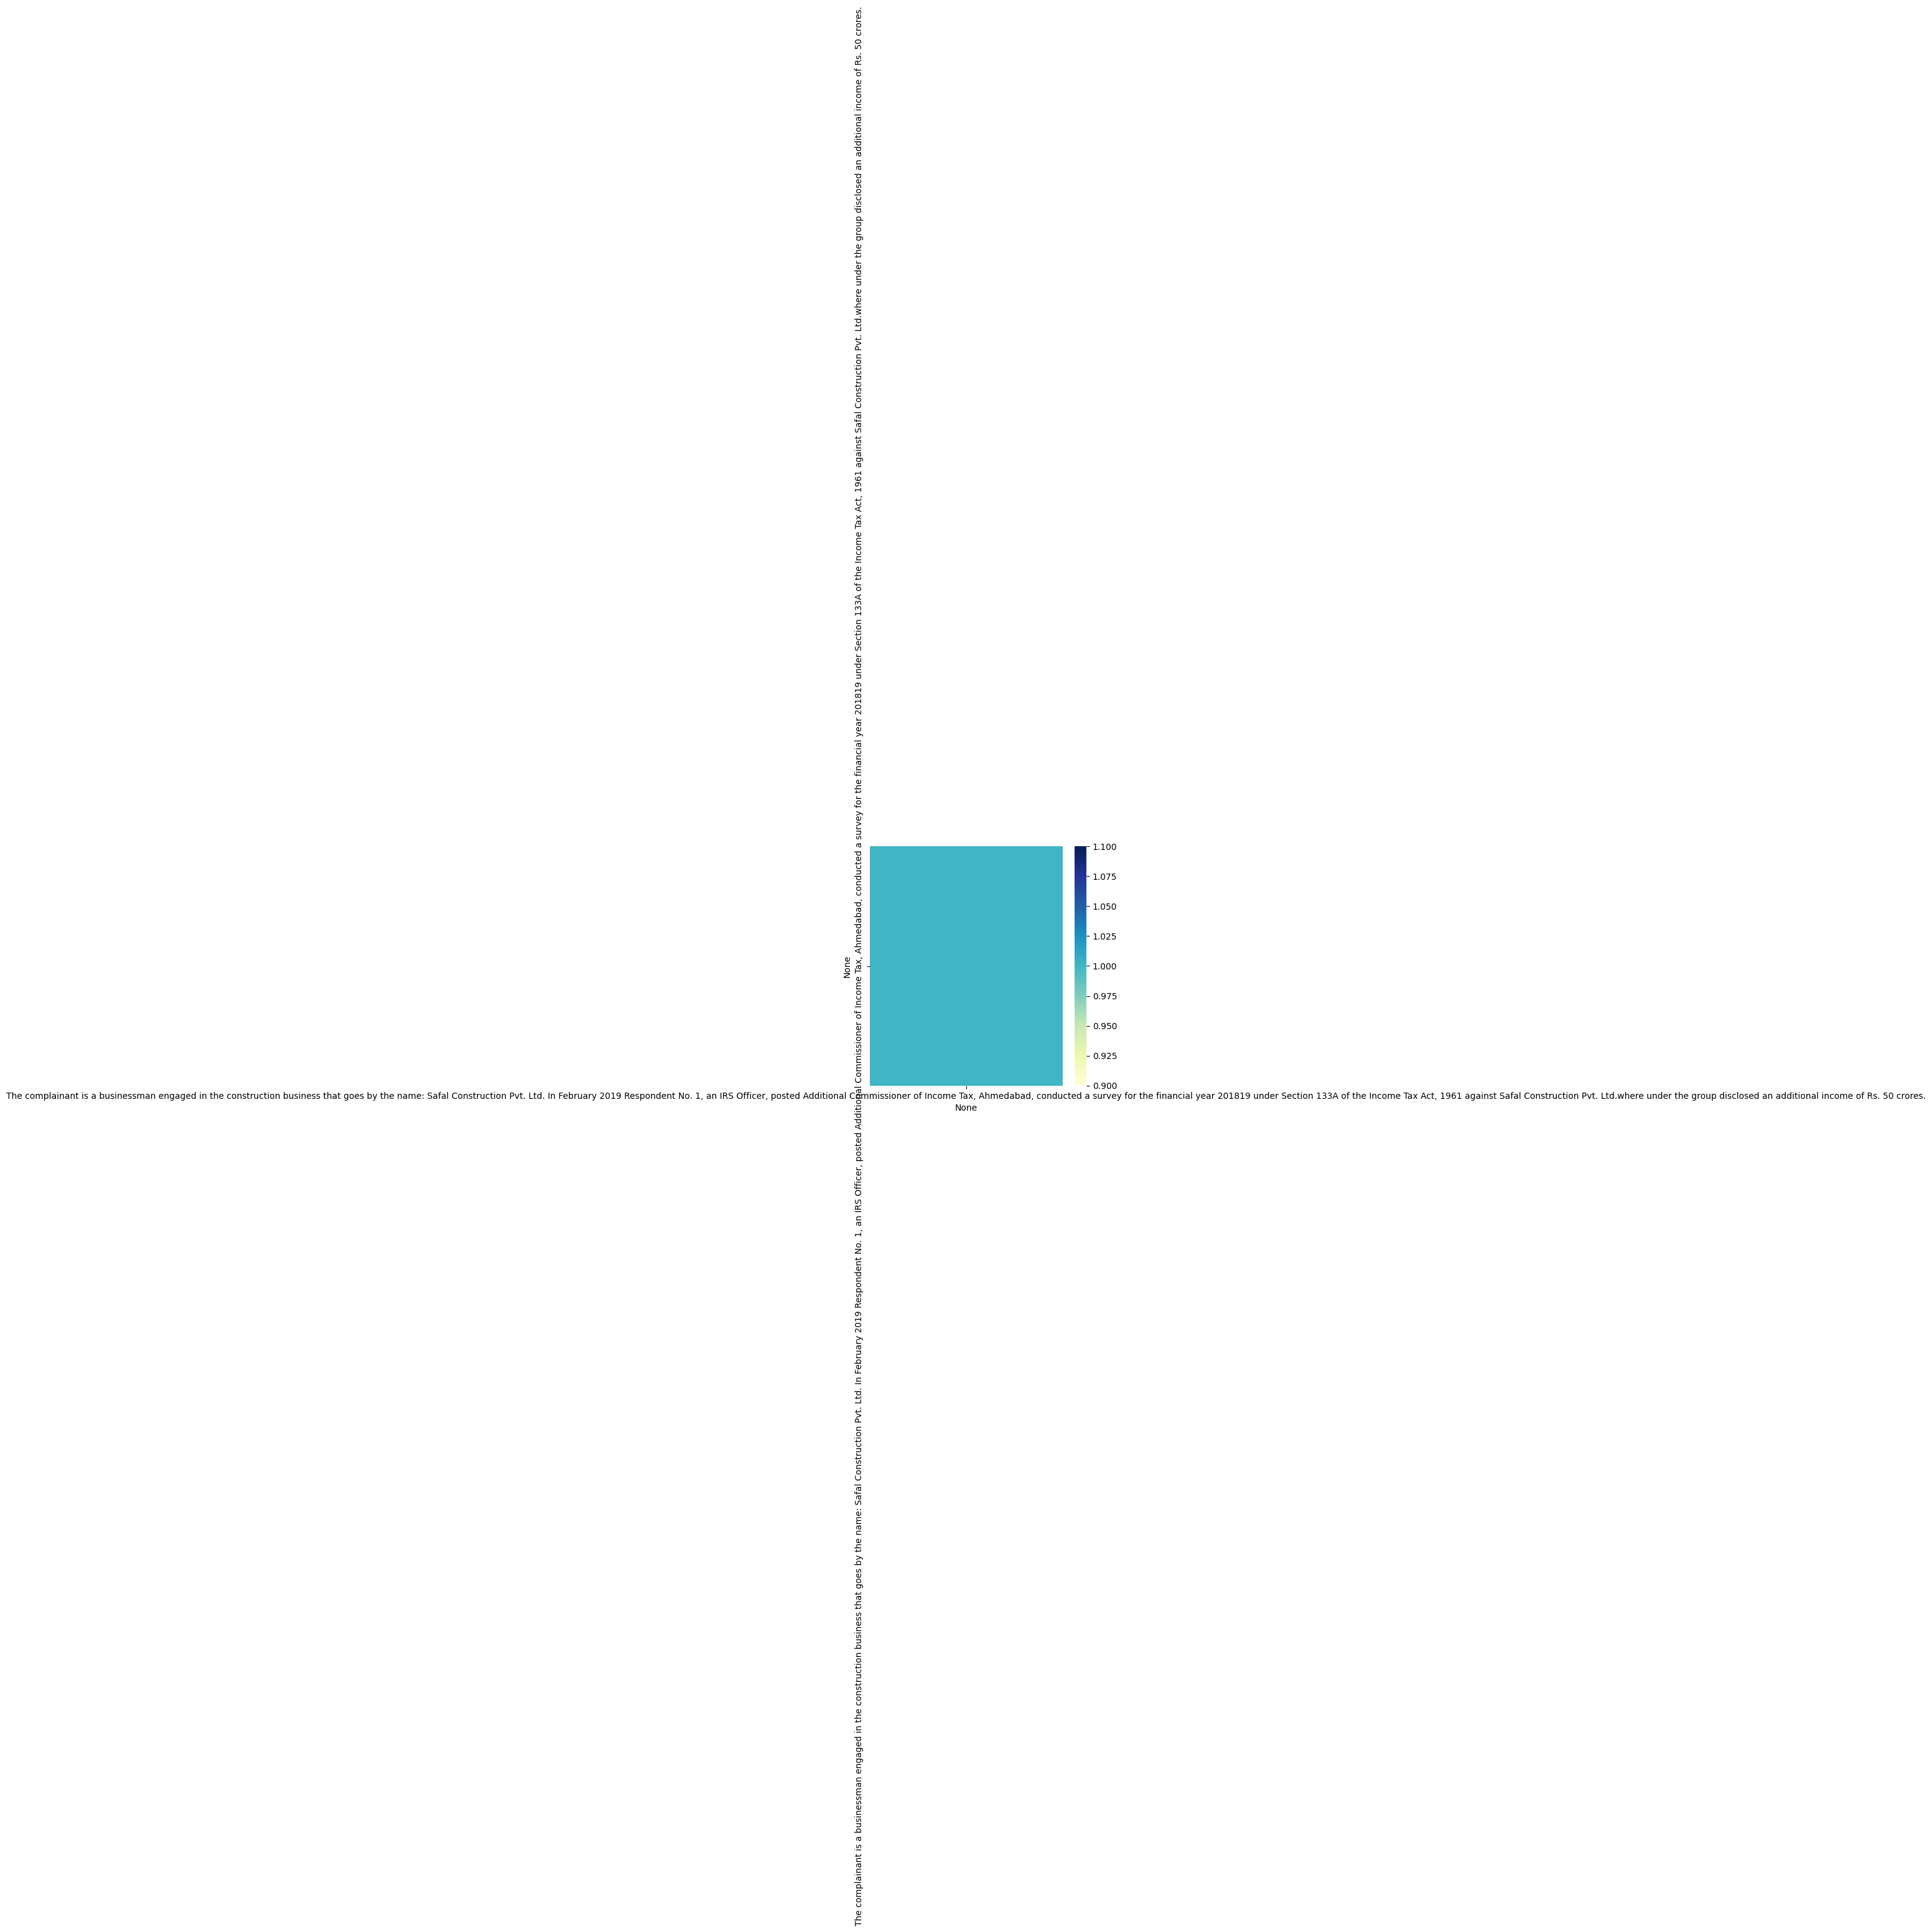

In [55]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentence1)
arr = X.toarray()

create_heatmap(cosine_similarity(arr))

## Spacy word2vec

In [56]:
doc = [nlp(sentence) for sentence in sentence1]

In [57]:
doc[0].vector

array([ 0.0199848 , -0.40079412, -0.06620954, -0.07082276,  0.25829437,
        0.18336558,  0.05369107,  0.48921937,  0.00201124,  0.06499821,
        0.07331979,  0.25788203, -0.38784882,  0.00685226, -0.3140622 ,
       -0.09873598, -0.24087268,  0.1625283 ,  0.05385158, -0.02364566,
       -0.43056208, -0.10141244,  0.08552322, -0.18644021,  0.23242289,
       -0.10293049,  0.6588157 ,  0.05642769,  0.3563681 ,  0.25102732,
       -0.07101519, -0.13637683,  0.35098374,  0.02357611, -0.22238483,
        0.04575419,  0.4591459 ,  0.4307277 , -0.40557256, -0.06802805,
       -0.09994403,  0.00473895, -0.1163382 ,  0.13787171, -0.21091184,
        0.31590253, -0.07548527,  0.04863636,  0.06644069, -0.00921005,
       -0.65065104,  0.02181039,  0.34194258, -0.10020206, -0.24571243,
        0.12253276,  0.07052456, -0.11829089,  0.359732  , -0.17550258,
       -0.21949928, -0.69726807,  0.07077109, -0.19922608, -0.12288067,
       -0.17585628,  0.18631113, -0.09713684,  0.02907398,  0.09

In [62]:
!pip install sentence-transformers

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.1 MB/s eta 0:00:00 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 1.8 MB/s eta 0:00:001.8 MB/s eta 0:00:01
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=24efa07ca206ca678dcd4d93159e28c2a013b355d3c1c2196a6b78f9f7ae43d8
  Stored in directory: /home/ujjawal/.cache/pip/wheels/ff/27/bf/ffba8b318b02d7f691a57084ee154e26ed24d012b0c7805881
Successfully built sentence-transformers


## Hugging Face 

In [65]:

from sentence_transformers import SentenceTransformer, util


model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

#Compute embedding for both lists
embedding_1= model.encode(sentence1[0], convert_to_tensor=True)
embedding_2 = model.encode(sentence2[0], convert_to_tensor=True)

util.pytorch_cos_sim(embedding_1, embedding_2)
## tensor([[0.6003]])


tensor([[0.6171]])

In [66]:
import nltk

In [68]:
sentence3 = 'The complainant is a businessman engaged in the construction business that goes by the name: Safal Construction Pvt. Ltd. In February 2019 Respondent No. 1, an IRS Officer, posted Additional Commissioner of Income Tax, Ahmedabad, conducted a survey for the financial year 201819 under Section 133A of the Income Tax Act, 1961 against Safal Construction Pvt. Ltd.where under the group disclosed an additional income of Rs. 50 crores.'

In [69]:
tokens = nltk.word_tokenize(sentence3)
tokens

['The',
 'complainant',
 'is',
 'a',
 'businessman',
 'engaged',
 'in',
 'the',
 'construction',
 'business',
 'that',
 'goes',
 'by',
 'the',
 'name',
 ':',
 'Safal',
 'Construction',
 'Pvt',
 '.',
 'Ltd',
 '.',
 'In',
 'February',
 '2019',
 'Respondent',
 'No',
 '.',
 '1',
 ',',
 'an',
 'IRS',
 'Officer',
 ',',
 'posted',
 'Additional',
 'Commissioner',
 'of',
 'Income',
 'Tax',
 ',',
 'Ahmedabad',
 ',',
 'conducted',
 'a',
 'survey',
 'for',
 'the',
 'financial',
 'year',
 '201819',
 'under',
 'Section',
 '133A',
 'of',
 'the',
 'Income',
 'Tax',
 'Act',
 ',',
 '1961',
 'against',
 'Safal',
 'Construction',
 'Pvt',
 '.',
 'Ltd.where',
 'under',
 'the',
 'group',
 'disclosed',
 'an',
 'additional',
 'income',
 'of',
 'Rs',
 '.',
 '50',
 'crores',
 '.']

In [70]:
tagged = nltk.pos_tag(tokens)

In [71]:
tagged

[('The', 'DT'),
 ('complainant', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('businessman', 'NN'),
 ('engaged', 'VBN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('construction', 'NN'),
 ('business', 'NN'),
 ('that', 'WDT'),
 ('goes', 'VBZ'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('name', 'NN'),
 (':', ':'),
 ('Safal', 'NNP'),
 ('Construction', 'NNP'),
 ('Pvt', 'NNP'),
 ('.', '.'),
 ('Ltd', 'NNP'),
 ('.', '.'),
 ('In', 'IN'),
 ('February', 'NNP'),
 ('2019', 'CD'),
 ('Respondent', 'NNP'),
 ('No', 'NNP'),
 ('.', '.'),
 ('1', 'CD'),
 (',', ','),
 ('an', 'DT'),
 ('IRS', 'NNP'),
 ('Officer', 'NNP'),
 (',', ','),
 ('posted', 'VBD'),
 ('Additional', 'NNP'),
 ('Commissioner', 'NNP'),
 ('of', 'IN'),
 ('Income', 'NNP'),
 ('Tax', 'NNP'),
 (',', ','),
 ('Ahmedabad', 'NNP'),
 (',', ','),
 ('conducted', 'VBD'),
 ('a', 'DT'),
 ('survey', 'NN'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('financial', 'JJ'),
 ('year', 'NN'),
 ('201819', 'CD'),
 ('under', 'IN'),
 ('Section', 'NN'),
 ('133A', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('

In [74]:
!pip install svgling

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.1 MB/s eta 0:00:00 MB/s eta 0:00:01


In [75]:
entities = nltk.chunk.ne_chunk(tagged)

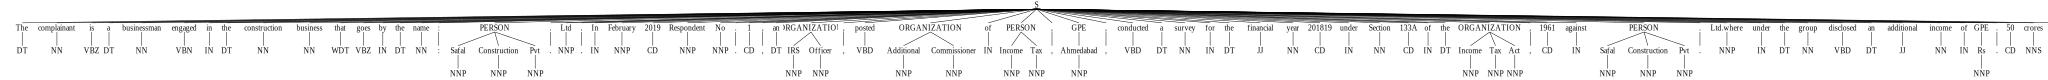

In [76]:
entities

In [77]:
!pip install rouge-score nltk

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=8caebb5658e717e0527bdc8a98d67e5214f03da39bed1c4e25afa07ba490dbf8
  Stored in directory: /home/ujjawal/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [78]:
import transformers

In [79]:
model_checkpoint = "t5-small"

In [80]:
from datasets import load_dataset, load_metric

raw_datasets = load_dataset("xsum")
metric = load_metric("rouge")

Generating train split:   0%|          | 0/204045 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11332 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11334 [00:00<?, ? examples/s]

Dataset xsum downloaded and prepared to /home/ujjawal/.cache/huggingface/datasets/xsum/default/1.2.0/082863bf4754ee058a5b6f6525d0cb2b18eadb62c7b370b095d1364050a52b71. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_9977/2617661662.py:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("rouge")


In [81]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 204045
    })
    validation: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11332
    })
    test: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11334
    })
})

In [82]:
raw_datasets["train"][0]

{'document': 'The full cost of damage in Newton Stewart, one of the areas worst affected, is still being assessed.\nRepair work is ongoing in Hawick and many roads in Peeblesshire remain badly affected by standing water.\nTrains on the west coast mainline face disruption due to damage at the Lamington Viaduct.\nMany businesses and householders were affected by flooding in Newton Stewart after the River Cree overflowed into the town.\nFirst Minister Nicola Sturgeon visited the area to inspect the damage.\nThe waters breached a retaining wall, flooding many commercial properties on Victoria Street - the main shopping thoroughfare.\nJeanette Tate, who owns the Cinnamon Cafe which was badly affected, said she could not fault the multi-agency response once the flood hit.\nHowever, she said more preventative work could have been carried out to ensure the retaining wall did not fail.\n"It is difficult but I do think there is so much publicity for Dumfries and the Nith - and I totally apprecia

In [83]:
# show random elements
import datasets
import random
import pandas as pd
from IPython.display import display, HTML


def show_random_elements(dataset, num_examples=5):
    assert num_examples <= len(
        dataset
    ), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset) - 1)
        while pick in picks:
            pick = random.randint(0, len(dataset) - 1)
        picks.append(pick)

    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, datasets.ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
    display(HTML(df.to_html()))

In [84]:
show_random_elements(raw_datasets["train"])

In [85]:
metric

Metric(name: "rouge", features: {'predictions': Value(dtype='string', id='sequence'), 'references': Value(dtype='string', id='sequence')}, usage: """
Calculates average rouge scores for a list of hypotheses and references
Args:
    predictions: list of predictions to score. Each prediction
        should be a string with tokens separated by spaces.
    references: list of reference for each prediction. Each
        reference should be a string with tokens separated by spaces.
    rouge_types: A list of rouge types to calculate.
        Valid names:
        `"rouge{n}"` (e.g. `"rouge1"`, `"rouge2"`) where: {n} is the n-gram based scoring,
        `"rougeL"`: Longest common subsequence based scoring.
        `"rougeLSum"`: rougeLsum splits text using `"
"`.
        See details in https://github.com/huggingface/datasets/issues/617
    use_stemmer: Bool indicating whether Porter stemmer should be used to strip word suffixes.
    use_aggregator: Return aggregates if this is set to True
Retu

In [86]:
fake_preds = ["hello there", "general kenobi"]
fake_labels = ["hello there", "general kenobi"]
metric.compute(predictions=fake_preds, references=fake_labels)

{'rouge1': AggregateScore(low=Score(precision=1.0, recall=1.0, fmeasure=1.0), mid=Score(precision=1.0, recall=1.0, fmeasure=1.0), high=Score(precision=1.0, recall=1.0, fmeasure=1.0)),
 'rouge2': AggregateScore(low=Score(precision=1.0, recall=1.0, fmeasure=1.0), mid=Score(precision=1.0, recall=1.0, fmeasure=1.0), high=Score(precision=1.0, recall=1.0, fmeasure=1.0)),
 'rougeL': AggregateScore(low=Score(precision=1.0, recall=1.0, fmeasure=1.0), mid=Score(precision=1.0, recall=1.0, fmeasure=1.0), high=Score(precision=1.0, recall=1.0, fmeasure=1.0)),
 'rougeLsum': AggregateScore(low=Score(precision=1.0, recall=1.0, fmeasure=1.0), mid=Score(precision=1.0, recall=1.0, fmeasure=1.0), high=Score(precision=1.0, recall=1.0, fmeasure=1.0))}

In [87]:
#get a tokenizer that corresponds to the model architecture we want to use,
#download the vocabulary used when pretraining this specific checkpoint.

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [88]:
tokenizer(["Hello, this is a sentence!", "This is another sentence."])

{'input_ids': [[8774, 6, 48, 19, 3, 9, 7142, 55, 1], [100, 19, 430, 7142, 5, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}

In [89]:
if model_checkpoint in ["t5-small", "t5-base", "t5-large", "t5-3b", "t5-11b"]:
    prefix = "summarize: "
else:
    prefix = ""

In [90]:
max_input_length = 1024
max_target_length = 128


def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["document"]]
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True)

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            examples["summary"], max_length=max_target_length, truncation=True
        )

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [91]:
preprocess_function(raw_datasets["train"][:2])

/home/ujjawal/.local/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:3596: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


{'input_ids': [[21603, 10, 37, 423, 583, 13, 1783, 16, 20126, 16496, 6, 80, 13, 8, 844, 6025, 4161, 6, 19, 341, 271, 14841, 5, 7057, 161, 19, 4912, 16, 1626, 5981, 11, 186, 7540, 16, 1276, 15, 2296, 7, 5718, 2367, 14621, 4161, 57, 4125, 387, 5, 15059, 7, 30, 8, 4653, 4939, 711, 747, 522, 17879, 788, 12, 1783, 44, 8, 15763, 6029, 1813, 9, 7472, 5, 1404, 1623, 11, 5699, 277, 130, 4161, 57, 18368, 16, 20126, 16496, 227, 8, 2473, 5895, 15, 147, 89, 22411, 139, 8, 1511, 5, 1485, 3271, 3, 21926, 9, 472, 19623, 5251, 8, 616, 12, 15614, 8, 1783, 5, 37, 13818, 10564, 15, 26, 3, 9, 3, 19513, 1481, 6, 18368, 186, 1328, 2605, 30, 7488, 1887, 3, 18, 8, 711, 2309, 9517, 89, 355, 5, 3966, 1954, 9233, 15, 6, 113, 293, 7, 8, 16548, 13363, 106, 14022, 84, 47, 14621, 4161, 6, 243, 255, 228, 59, 7828, 8, 1249, 18, 545, 11298, 1773, 728, 8, 8347, 1560, 5, 611, 6, 255, 243, 72, 1709, 1528, 161, 228, 43, 118, 4006, 91, 12, 766, 8, 3, 19513, 1481, 410, 59, 5124, 5, 96, 196, 17, 19, 1256, 68, 27, 103, 317, 132

In [92]:
tokenized_datasets = raw_datasets.map(preprocess_function, batched=True)

Map:   0%|          | 0/204045 [00:00<?, ? examples/s]

Map:   0%|          | 0/11332 [00:00<?, ? examples/s]

Map:   0%|          | 0/11334 [00:00<?, ? examples/s]

In [93]:
from transformers import TFAutoModelForSeq2SeqLM, DataCollatorForSeq2Seq

model = TFAutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-small.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [94]:
batch_size = 8
learning_rate = 2e-5
weight_decay = 0.01
num_train_epochs = 1

In [95]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, return_tensors="np")

generation_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, return_tensors="np", pad_to_multiple_of=128)

In [96]:
tokenized_datasets["train"]

Dataset({
    features: ['document', 'summary', 'id', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 204045
})

In [97]:
train_dataset = model.prepare_tf_dataset(
    tokenized_datasets["train"],
    batch_size=batch_size,
    shuffle=True,
    collate_fn=data_collator,
)

validation_dataset = model.prepare_tf_dataset(
    tokenized_datasets["validation"],
    batch_size=batch_size,
    shuffle=False,
    collate_fn=data_collator,
)

generation_dataset = model.prepare_tf_dataset(
    tokenized_datasets["validation"],
    batch_size=8,
    shuffle=False,
    collate_fn=generation_data_collator
)

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/home/ujjawal/.local/lib/python3.11/site-packages/datasets/arrow_dataset.py:388: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [98]:
from transformers import AdamWeightDecay
import tensorflow as tf

optimizer = AdamWeightDecay(learning_rate=learning_rate, weight_decay_rate=weight_decay)
model.compile(optimizer=optimizer)

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


In [99]:
import numpy as np
import nltk


def metric_fn(eval_predictions):
    predictions, labels = eval_predictions
    decoded_predictions = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    for label in labels:
        label[label < 0] = tokenizer.pad_token_id  # Replace masked label tokens
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    # Rouge expects a newline after each sentence
    decoded_predictions = [
        "\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_predictions
    ]
    decoded_labels = [
        "\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels
    ]
    result = metric.compute(
        predictions=decoded_predictions, references=decoded_labels, use_stemmer=True
    )
    # Extract a few results
    result = {key: value.mid.fmeasure * 100 for key, value in result.items()}
    # Add mean generated length
    prediction_lens = [
        np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions
    ]
    result["gen_len"] = np.mean(prediction_lens)

    return result

In [103]:
from transformers.keras_callbacks import PushToHubCallback, KerasMetricCallback
from tensorflow.keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir="./summarization_model_save/logs")


metric_callback = KerasMetricCallback(
    metric_fn, eval_dataset=generation_dataset, predict_with_generate=True, use_xla_generation=True
)

callbacks = [metric_callback, tensorboard_callback]

model.fit(
    train_dataset, validation_data=validation_dataset, epochs=1, callbacks=callbacks
)

2023-06-05 13:49:49.823574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [204045]
	 [[{{node Placeholder/_0}}]]
2023-06-05 13:49:49.823819: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [204045]
	 [[{{node Placeholder/_0}}]]
2023-06-05 13:50:06.803347: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 526385152 exceeds 10% of free system memory.


    1/25505 [..............................] - ETA: 157:50:09 - loss: 3.9465

2023-06-05 13:50:16.027334: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 526385152 exceeds 10% of free system memory.


    2/25505 [..............................] - ETA: 63:26:24 - loss: 3.9384 

2023-06-05 13:50:23.060786: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 526385152 exceeds 10% of free system memory.


    3/25505 [..............................] - ETA: 47:38:37 - loss: 3.8620

2023-06-05 13:50:29.494092: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 526385152 exceeds 10% of free system memory.


    4/25505 [..............................] - ETA: 53:28:44 - loss: 3.8290

2023-06-05 13:50:38.818663: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 526385152 exceeds 10% of free system memory.


    5/25505 [..............................] - ETA: 56:30:27 - loss: 3.8376

KeyboardInterrupt: 